<a href="https://colab.research.google.com/github/Aayushktyagi/DeepLearning_Resources/blob/master/Logositc%26LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content

1.   Logistic regression using Heart Disease Prediction dataset
2.   Linear regression using Fuel proce prediction dataset



In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip3 install tensorflow==2.0.0-beta1
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import csv
from tensorflow import keras
from tensorflow.keras import layers 
import seaborn as sns 
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
tf.__version__

In [0]:
#Load dataset 
URL = 'https://storage.googleapis.com/applied-dl/heart.csv'
dataframe = pd.read_csv(URL)
dataframe.head()


In [0]:
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


193 train examples
49 validation examples
61 test examples


In [0]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
  feature_columns.append(feature_column.numeric_column(header))

In [0]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [0]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)


In [0]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

2/2 [==============================] - 0s 18ms/step - loss: 1.0056 - accuracy: 0.6557
Accuracy 0.6557377


Linear Regression

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-n

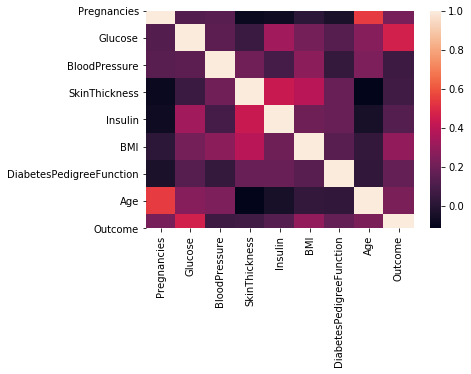

In [37]:
diabetes = pd.read_csv("drive/My Drive/Dataset/diabetes.csv")
print(diabetes.head())
print(diabetes.info())
print("Diabetes data set dimensions : {}".format(diabetes.shape))
corr = diabetes.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [0]:
# Split dataset 
dfTrain = diabetes[:650]
dfVal = diabetes[650:750]
dfTest = diabetes[750:]

#Split labels
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
valLabel = np.asarray(dfVal['Outcome'])
valdata = np.asarray(dfVal.drop('Outcome',1))

In [39]:
# Fit model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(trainData , trainLabel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'predicted data')

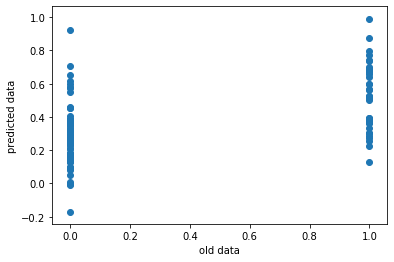

In [40]:
plt.scatter(valLabel,linear_reg.predict(valdata))
plt.xlabel('old data')
plt.ylabel('predicted data')